In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [62]:
df=pd.read_csv(r"C:\Users\nikhi\PythonMasterClass\Data Analytics Bootcamp\Loan_default.csv")

In [63]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [64]:
df.shape

(255347, 18)

In [65]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [6]:
df.isnull().any()

LoanID            False
Age               False
Income            False
LoanAmount        False
CreditScore       False
MonthsEmployed    False
NumCreditLines    False
InterestRate      False
LoanTerm          False
DTIRatio          False
Education         False
EmploymentType    False
MaritalStatus     False
HasMortgage       False
HasDependents     False
LoanPurpose       False
HasCoSigner       False
Default           False
dtype: bool

In [15]:
df.isnull().any().sum()

0

None of the columns have missing values

In [7]:
df['Default'].value_counts()

0    225694
1     29653
Name: Default, dtype: int64

In [7]:
total=df['Default'].value_counts().sum()

In [8]:
(df['Default'].value_counts())/(total)*100

0    88.387175
1    11.612825
Name: Default, dtype: float64

<AxesSubplot:ylabel='Default'>

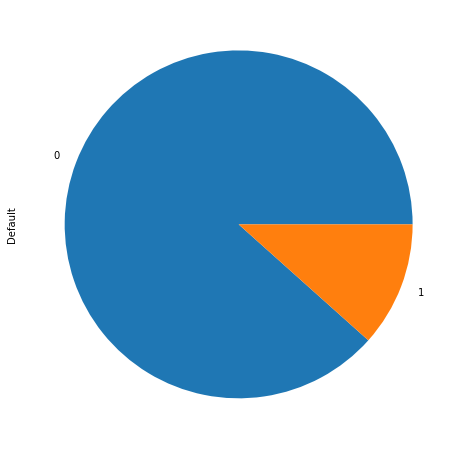

In [9]:
df['Default'].value_counts().plot(kind='pie',figsize=(8,8))

We see that the dataset is heavily skewed with the number of non-defaulters being significantly higher than the number of defaulters

In [10]:
df.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [11]:
df['Default']=df['Default'].astype('str')

In [12]:
df.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default            object
dtype: object

In [13]:
df['Default'].replace({'0':'No-Default','1':'Default'},inplace=True)

In [14]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,No-Default
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,No-Default
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,Default
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,No-Default
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,No-Default


The result of the chi-square test reveals a significant relationship between education levels and loan default

In [54]:
df[df['Default']=='Default'].groupby('Education')['Education'].count().sort_values(ascending=False)

Education
High School    8230
Bachelor's     7789
Master's       6908
PhD            6726
Name: Education, dtype: int64

Most of the defaulters had a high school degree, while those with a PhD degree were less likely to default

# Univariate analysis (Categorical & Numerical)

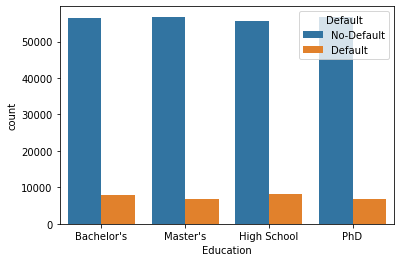

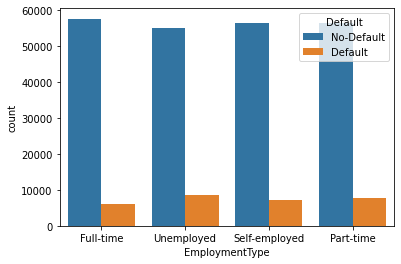

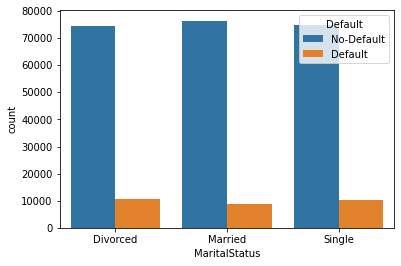

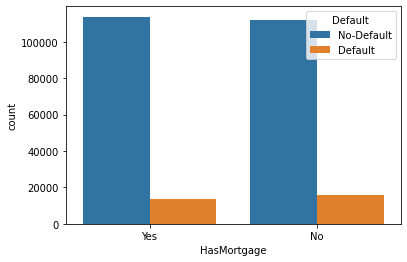

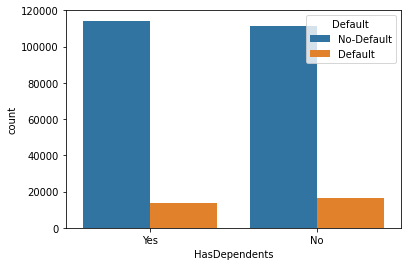

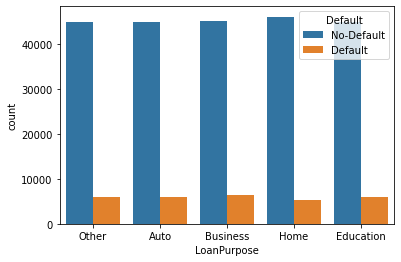

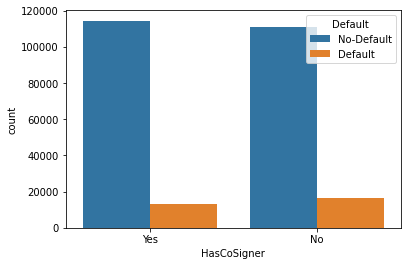

In [63]:
for i, predictor in enumerate(df.drop(columns=['LoanID', 'Age', 'Income', 'LoanAmount','CreditScore','MonthsEmployed','NumCreditLines','LoanTerm','InterestRate','DTIRatio','Default'],axis=1)):
    plt.figure(i)
    sns.countplot(data=df,x=predictor,hue="Default")

We see a pretty even distribution feature wise distribution for each cohort (Default & No-Default). To cross check, we will go through these features individually

In [18]:
df_default=df[df['Default']=='Default']

In [19]:
df_default.groupby(['Education'])['Education'].count().sort_values(ascending=False)

Education
High School    8230
Bachelor's     7789
Master's       6908
PhD            6726
Name: Education, dtype: int64

The highest defaulters are those who only have a High School education. The lowest defaulters are those who hold a PhD degree

In [20]:
df_default.groupby(['EmploymentType'])['EmploymentType'].count().sort_values(ascending=False)

EmploymentType
Unemployed       8650
Part-time        7677
Self-employed    7302
Full-time        6024
Name: EmploymentType, dtype: int64

As per norm, those who are unemployed are more likely to default on payments than those who have full-time jobs

In [21]:
df_default.groupby(['MaritalStatus'])['MaritalStatus'].count().sort_values(ascending=False)

MaritalStatus
Divorced    10657
Single      10127
Married      8869
Name: MaritalStatus, dtype: int64

Those who are divorced and single are more likely to default than those who are married

In [22]:
df_default.groupby(['HasMortgage'])['HasMortgage'].count().sort_values(ascending=False)

HasMortgage
No     15761
Yes    13892
Name: HasMortgage, dtype: int64

Those who don't have existing mortgages are more likely to default than those who already have mortgages

In [23]:
df_default.groupby(['HasDependents'])['HasDependents'].count().sort_values(ascending=False)

HasDependents
No     16237
Yes    13416
Name: HasDependents, dtype: int64

In [24]:
df_default.groupby(['LoanPurpose'])['LoanPurpose'].count().sort_values(ascending=False)

LoanPurpose
Business     6323
Auto         6041
Education    6038
Other        6002
Home         5249
Name: LoanPurpose, dtype: int64

Those who have taken home loans are less likely to default than those who have taken business loans

In [48]:
df_business_default=df_default[df_default['LoanPurpose']=='Business']

In [50]:
df_business_default['Income'].mean()

73142.3737150087

In [25]:
df_default.groupby(['HasCoSigner'])['HasCoSigner'].count().sort_values(ascending=False)

HasCoSigner
No     16423
Yes    13230
Name: HasCoSigner, dtype: int64

Customers whose loans have been granted in the presence of a co-signer are less likely to default

In [26]:
df.groupby(['Default'])['Income'].mean()

Default
Default       71844.722659
No-Default    83899.165995
Name: Income, dtype: float64

It can be seen that those who default have a lower annual income than those who don't default

In [27]:
df.groupby(['Default'])['Age'].mean()

Default
Default       36.559539
No-Default    44.409962
Name: Age, dtype: float64

It can be seen that those who default are on average 8 years younger than those who don't defualt

In [28]:
df.groupby(['Default'])['LoanAmount'].mean()

Default
Default       144515.311469
No-Default    125353.656017
Name: LoanAmount, dtype: float64

On average, defualters borrow a larger sum of money

In [32]:
df.groupby(['Default'])['CreditScore'].mean()

Default
Default       559.286143
No-Default    576.232270
Name: CreditScore, dtype: float64

Defaulters have a slightly lower credit score than non-defaulters

In [94]:
df.groupby(['Default'])['DTIRatio'].mean()

Default
Default       0.512467
No-Default    0.498602
Name: DTIRatio, dtype: float64

Non-Defaulters have a slightly lower 'Debt to Income Ratio'. This means that a lesser portion of their income is spent towards clearing debt

In [96]:
df.groupby(['Default'])['InterestRate'].mean()

Default
Default       15.896227
No-Default    13.176994
Name: InterestRate, dtype: float64

Interest rates on the loans of those who default are slightly higher than those who don't default

In [97]:
df.groupby(['Default'])['MonthsEmployed'].mean()

Default
Default       50.235457
No-Default    60.764721
Name: MonthsEmployed, dtype: float64

Those who default have been employed for fewer months than those who don't default

In [101]:
df.groupby(['Default'])['LoanTerm'].mean()

Default
Default       36.051394
No-Default    36.022544
Name: LoanTerm, dtype: float64

Near identical avergae loan terms of defaulters and non-defaulters

# Bi-Variate Analysis

In [34]:
df_default=df.loc[df['Default']=='Default']
df_nodefault=df.loc[df['Default']=='No-Default']
df_nodefault

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,No-Default
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,No-Default
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,No-Default
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,No-Default
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,No-Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255340,48LOOK4VR1,41,61809,119238,444,34,2,19.99,36,0.31,Master's,Part-time,Married,Yes,Yes,Auto,Yes,No-Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,No-Default
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,No-Default
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,No-Default


In [36]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

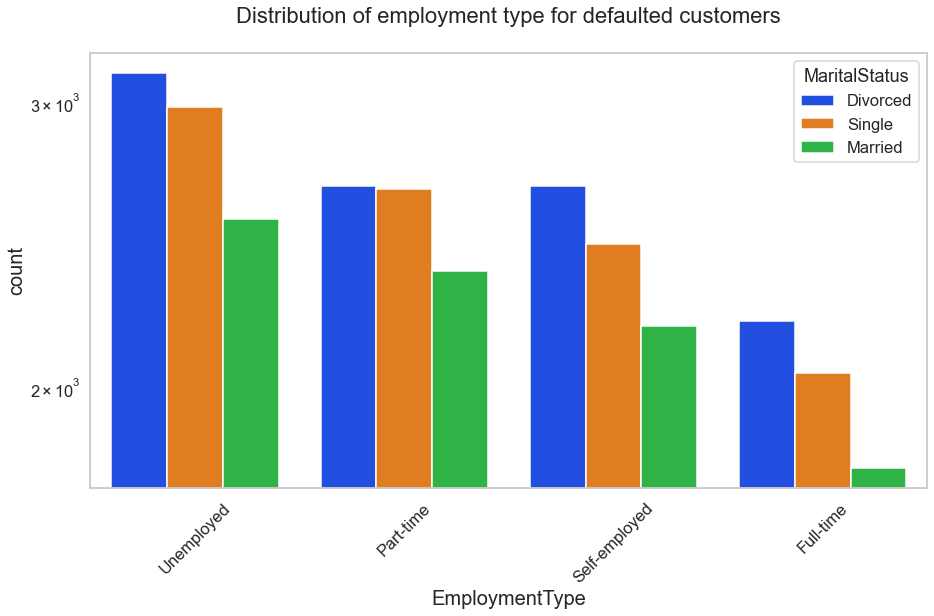

In [39]:
uniplot(df_default,col='EmploymentType',title='Distribution of employment type for defaulted customers',hue='MaritalStatus')

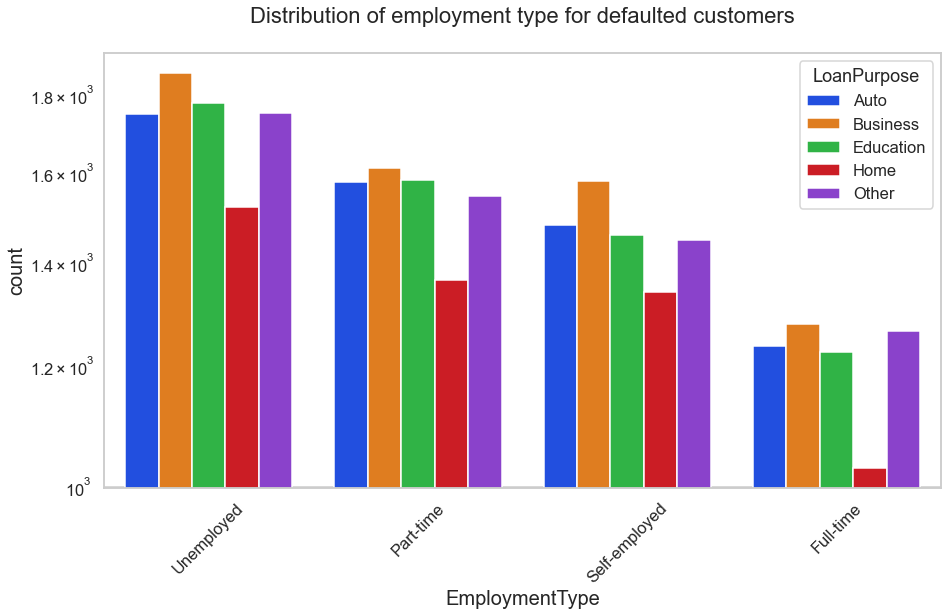

In [40]:
uniplot(df_default,col='EmploymentType',title='Distribution of employment type for defaulted customers',hue='LoanPurpose')

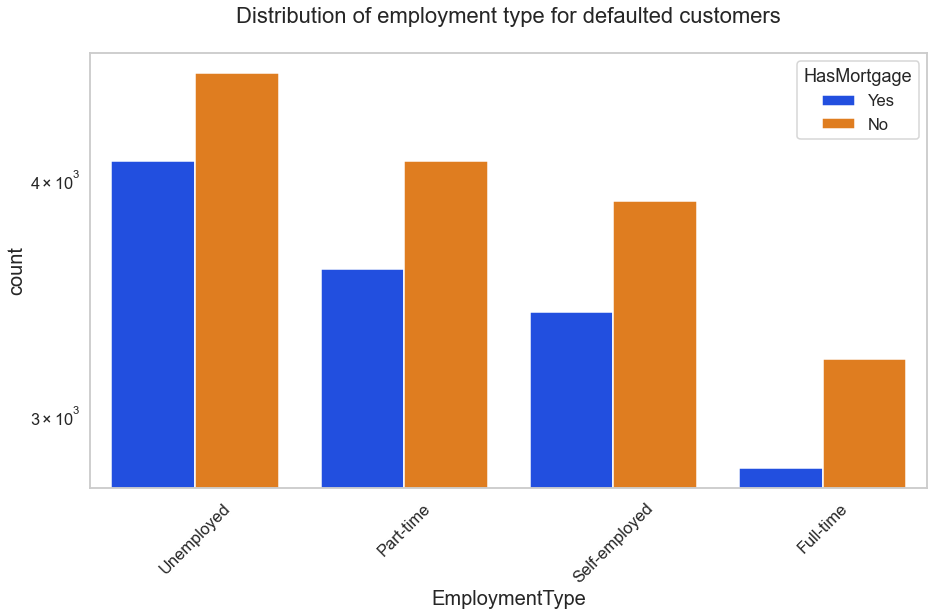

In [42]:
uniplot(df_default,col='EmploymentType',title='Distribution of employment type for defaulted customers',hue='HasMortgage')

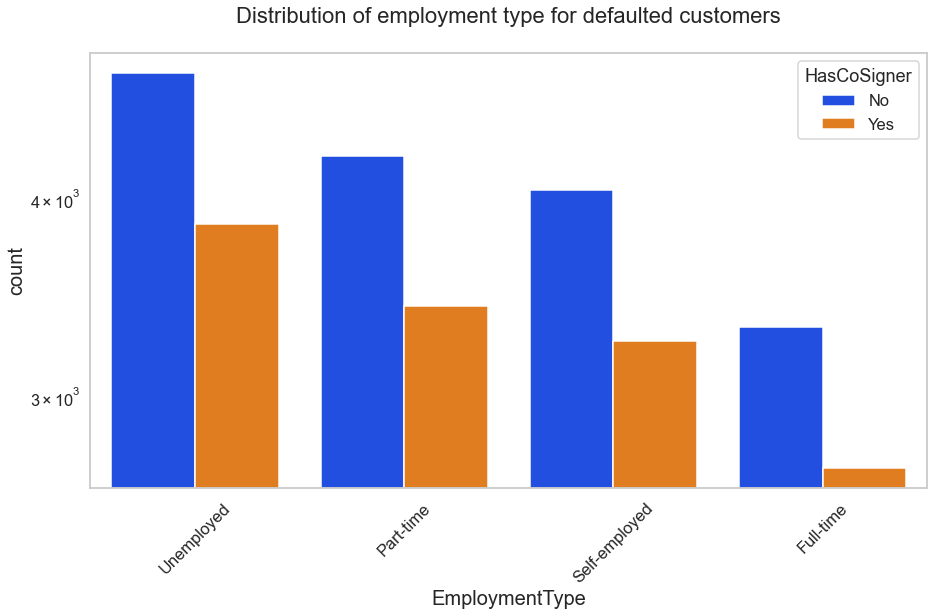

In [43]:
uniplot(df_default,col='EmploymentType',title='Distribution of employment type for defaulted customers',hue='HasCoSigner')

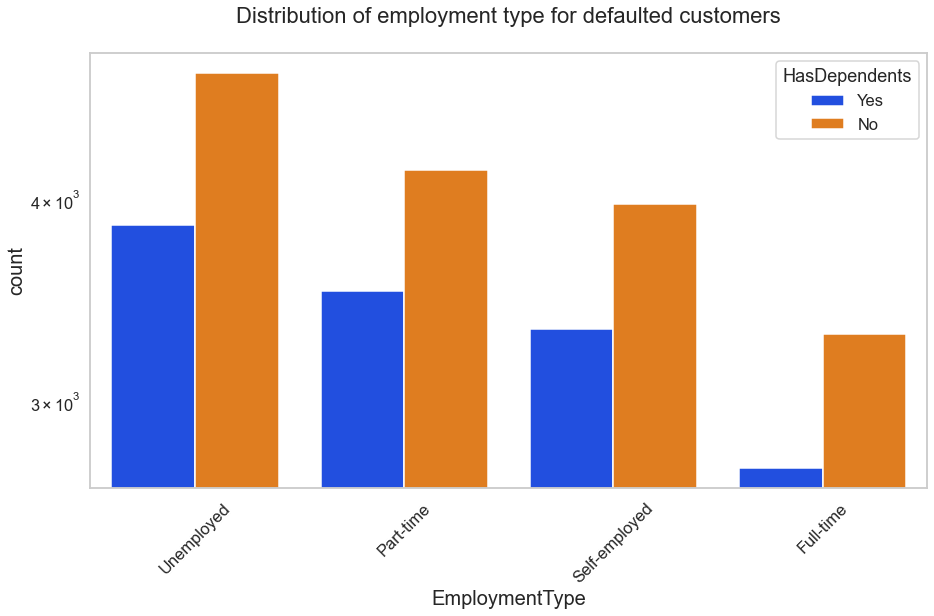

In [44]:
uniplot(df_default,col='EmploymentType',title='Distribution of employment type for defaulted customers',hue='HasDependents')

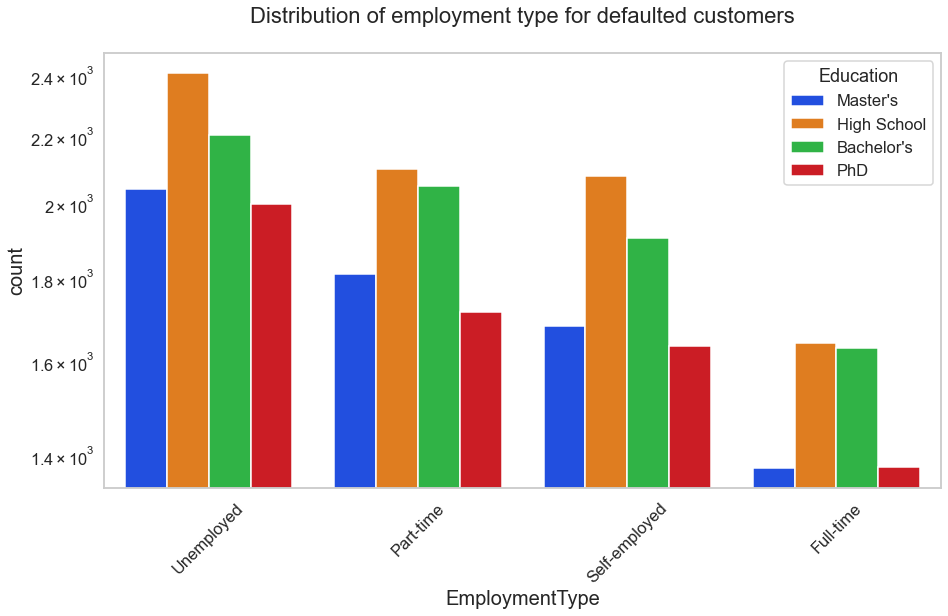

In [45]:
uniplot(df_default,col='EmploymentType',title='Distribution of employment type for defaulted customers',hue='Education')

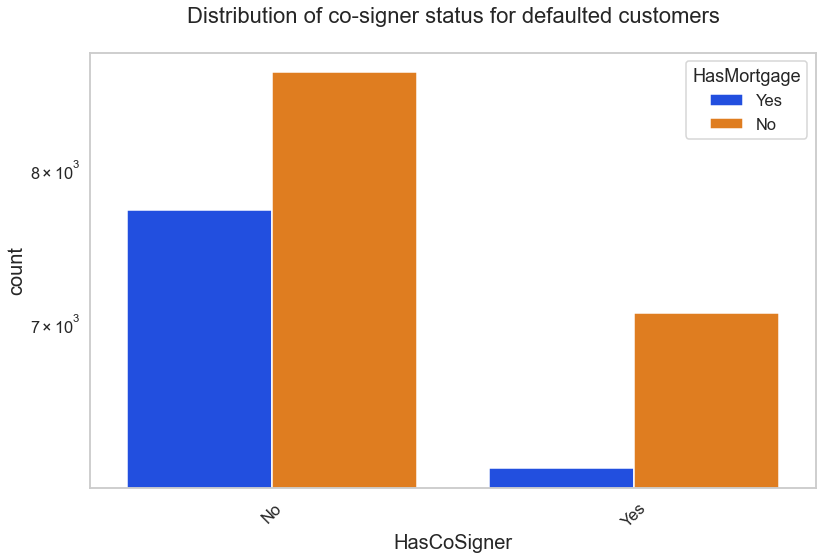

In [46]:
uniplot(df_default,col='HasCoSigner',title='Distribution of co-signer status for defaulted customers',hue='HasMortgage')

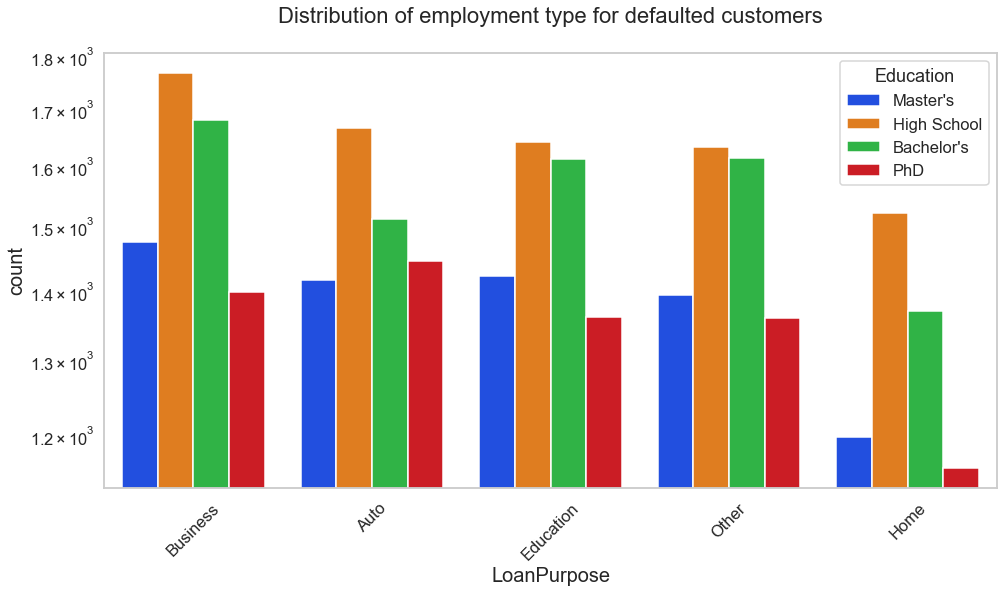

In [47]:
uniplot(df_default,col='LoanPurpose',title='Distribution of employment type for defaulted customers',hue='Education')

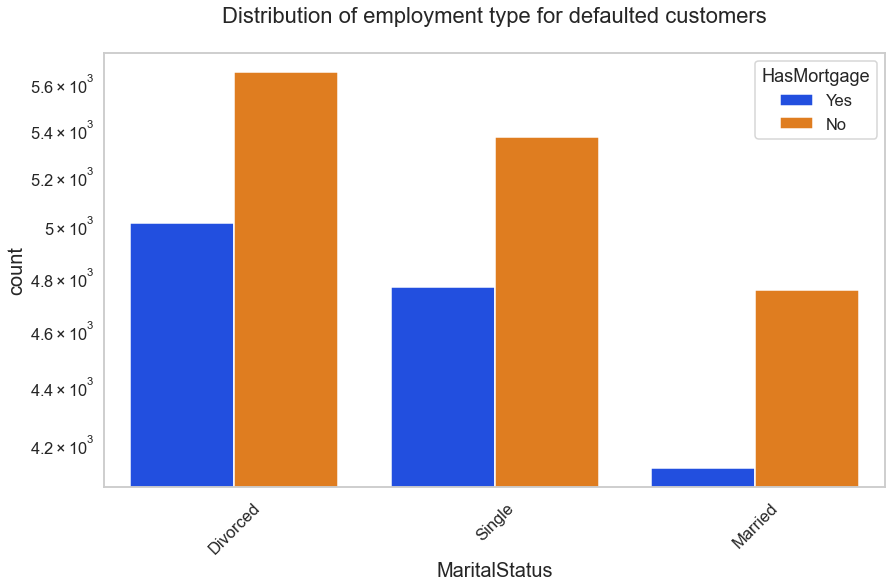

In [51]:
uniplot(df_default,col='MaritalStatus',title='Distribution of employment type for defaulted customers',hue='HasMortgage')

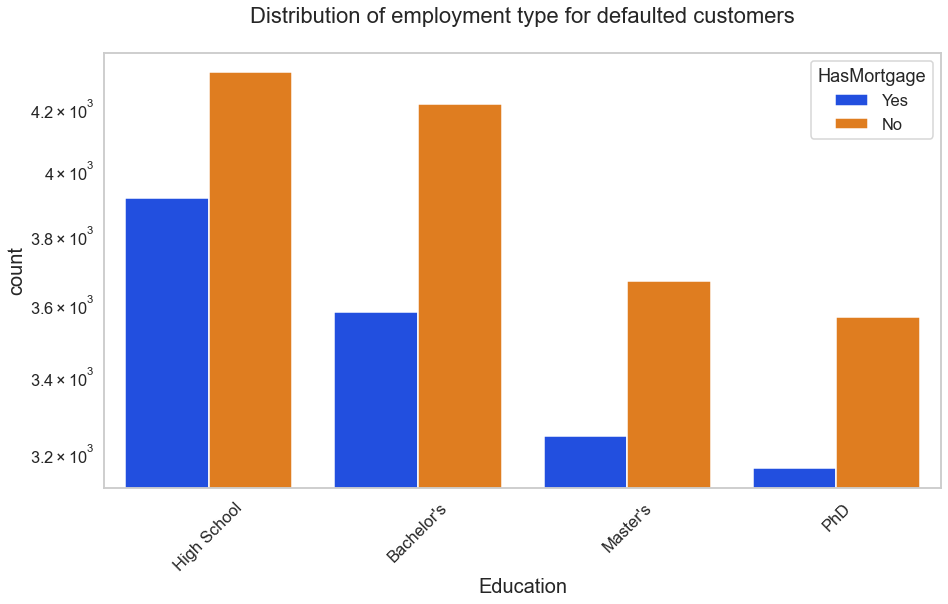

In [52]:
uniplot(df_default,col='Education',title='Distribution of employment type for defaulted customers',hue='HasMortgage')

# Insights

1. As per expectaions, those who are unemployed are more likely to default than those who are employed
2. Those who are single and divorced are more likely to default than those who are married.
3. Among defaulters, a majority of them are those who have taken loans for businesses.
4. Defaulters seem to have a lower average salaries than non-defaulters.
5. On average, those who default have taken heavier loans than those who do not default.
6. Those who default, have taken loans at a higher interest rate than those who do not default.
7. Those who default, have been employed for 10 months less than those who do not default.
8. Those who default, have an average age of 8 years less than those who default. This indicates that people in their middle age tend to default less.
9. Undestandably, those who default have a lesser credit score than those who don't default.
10. Defaulters have a slightly higher debt-to-income ratio. This indicates that a greater portion of their income is being spent on paying up debts.
11. Candidates who sign loan agreements with co-signers tend to default less than those candidates who sign agreements independently, i.e., without co-signers.
12. Among defaulters, those who have inly studied until high school deem to be defaulting the most. Whereas, those who have done their PHD's seem to default less.
13. Among those who default, a vast majority of them are unemployed and divorced, while those who are married and employed in full time jobs are least likely to default.
